In [1]:
# Parameters
file_path = "ORCL.csv"


<a href="https://colab.research.google.com/github/AshtonGlover/stock-prediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [3]:
import pandas as pd
import tensorflow

truncated_name = file_path.split(".")[0]
file_path = "datasets/" + file_path if 'file_path' in globals() else 'datasets/MSFT.csv'

df = pd.read_csv(file_path)

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-23,117.099998,120.449997,112.110001,117.839996,116.252716,16517300
1,2023-08-24,119.680000,119.730003,112.410004,112.910004,111.389130,11995900
2,2023-08-25,112.910004,116.150002,112.739998,116.059998,114.496696,8758100
3,2023-08-28,116.370003,117.709999,115.699997,116.839996,115.266182,4514800
4,2023-08-29,120.949997,121.209999,118.529999,120.650002,119.024872,11920500
...,...,...,...,...,...,...,...
247,2024-08-16,136.789993,137.820007,136.389999,137.470001,137.470001,4893800
248,2024-08-19,137.529999,137.949997,136.460007,137.919998,137.919998,3641600
249,2024-08-20,137.820007,139.789993,137.820007,139.169998,139.169998,3738300
250,2024-08-21,138.800003,140.300003,138.550003,140.199997,140.199997,3776800


In [4]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2023-08-23,117.839996
1,2023-08-24,112.910004
2,2023-08-25,116.059998
3,2023-08-28,116.839996
4,2023-08-29,120.650002
...,...,...
247,2024-08-16,137.470001
248,2024-08-19,137.919998
249,2024-08-20,139.169998
250,2024-08-21,140.199997


In [5]:
import datetime

def strToDate(s):
  split_date = s.split('-')
  day, month, year = int(split_date[2]), int(split_date[1]), int(split_date[0])
  return datetime.datetime(year = year, month = month, day = day)

In [6]:
df['Date'] = df['Date'].apply(strToDate)
df['Date']

/var/folders/t5/bfwy3czx4ks1lybmc4f9rd5m0000gn/T/ipykernel_88193/3418807745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(strToDate)


0     2023-08-23
1     2023-08-24
2     2023-08-25
3     2023-08-28
4     2023-08-29
         ...    
247   2024-08-16
248   2024-08-19
249   2024-08-20
250   2024-08-21
251   2024-08-22
Name: Date, Length: 252, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2023-08-23,117.839996
2023-08-24,112.910004
2023-08-25,116.059998
2023-08-28,116.839996
2023-08-29,120.650002
...,...
2024-08-16,137.470001
2024-08-19,137.919998
2024-08-20,139.169998


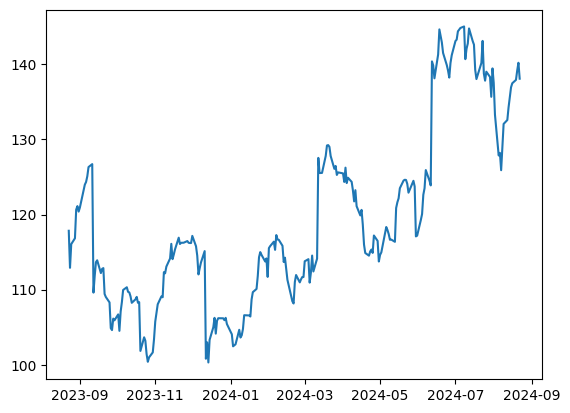

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = strToDate(first_date_str)
  last_date  = strToDate(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(len(df_subset))
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df,
                                '2023-10-05',
                                '2024-08-22',
                                n=30)
windowed_df

,Target Date,Target-30,Target-29,Target-28,Target-27,Target-26,Target-25,Target-24,Target-23,Target-22,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2023-10-05,117.839996,112.910004,116.059998,116.839996,120.650002,121.120003,120.389999,120.930000,123.980003,...,109.029999,108.300003,104.879997,104.620003,106.150002,105.919998,106.709999,104.519997,107.080002,108.349998
1,2023-10-06,112.910004,116.059998,116.839996,120.650002,121.120003,120.389999,120.930000,123.980003,124.330002,...,108.300003,104.879997,104.620003,106.150002,105.919998,106.709999,104.519997,107.080002,108.349998,109.959999
2,2023-10-09,116.059998,116.839996,120.650002,121.120003,120.389999,120.930000,123.980003,124.330002,125.089996,...,104.879997,104.620003,106.150002,105.919998,106.709999,104.519997,107.080002,108.349998,109.959999,110.320000
3,2023-10-10,116.839996,120.650002,121.120003,120.389999,120.930000,123.980003,124.330002,125.089996,126.320000,...,104.620003,106.150002,105.919998,106.709999,104.519997,107.080002,108.349998,109.959999,110.320000,109.709999
4,2023-10-11,120.650002,121.120003,120.389999,120.930000,123.980003,124.330002,125.089996,126.320000,126.709999,...,106.150002,105.919998,106.709999,104.519997,107.080002,108.349998,109.959999,110.320000,109.709999,109.639999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2024-08-16,144.830002,145.029999,140.679993,142.070007,142.759995,144.770004,143.070007,142.610001,139.259995,...,127.860001,128.210007,125.900002,128.960007,132.059998,132.580002,134.259995,135.600006,136.929993,137.470001
218,2024-08-19,145.029999,140.679993,142.070007,142.759995,144.770004,143.070007,142.610001,139.259995,138.029999,...,128.210007,125.900002,128.960007,132.059998,132.580002,134.259995,135.600006,136.929993,137.470001,137.919998
219,2024-08-20,140.679993,142.070007,142.759995,144.770004,143.070007,142.610001,139.259995,138.029999,138.559998,...,125.900002,128.960007,132.059998,132.580002,134.259995,135.600006,136.929993,137.470001,137.919998,139.169998
220,2024-08-21,142.070007,142.759995,144.770004,143.070007,142.610001,139.259995,138.029999,138.559998,140.169998,...,128.960007,132.059998,132.580002,134.259995,135.600006,136.929993,137.470001,137.919998,139.169998,140.199997


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  dfasnp = windowed_dataframe.to_numpy()

  dates = dfasnp[:, 0]

  middle_matrix = dfasnp[:, 1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = dfasnp[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((222,), (222, 30, 1), (222,))

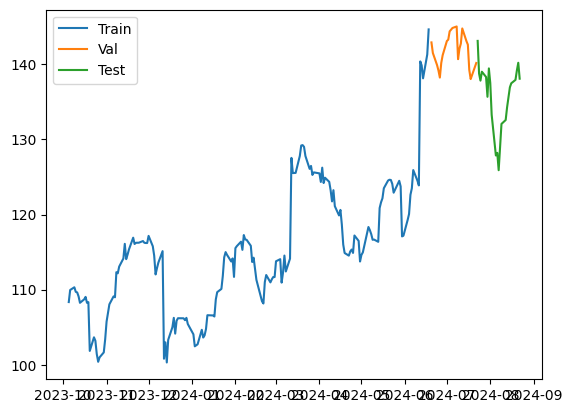

In [11]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, x_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, x_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

dates_test, x_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Val', 'Test'])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential([
                    layers.Input(shape=(30, 1)),

                    layers.LSTM(units=256),

                    layers.Dense(units=256, activation='relu'),
                    layers.Dense(units=128, activation='relu'),
                    layers.Dense(units=64, activation='relu'),
                    layers.Dense(units=32, activation='relu'),
                    layers.Dense(units=1)
                ])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 100)



Epoch 1/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 3s 732ms/step - loss: 12821.3965 - mean_absolute_error: 113.0244

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12946.6553 - mean_absolute_error: 113.5101 

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 12935.4121 - mean_absolute_error: 113.4489 - val_loss: 18705.5234 - val_mean_absolute_error: 136.7508


Epoch 2/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 11905.9473 - mean_absolute_error: 108.8746

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11650.2363 - mean_absolute_error: 107.6371

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11565.6973 - mean_absolute_error: 107.2278 - val_loss: 15518.4619 - val_mean_absolute_error: 124.5539


Epoch 3/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9258.8340 - mean_absolute_error: 95.8006

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8553.7842 - mean_absolute_error: 91.9266

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8247.2715 - mean_absolute_error: 90.1312 - val_loss: 8047.1035 - val_mean_absolute_error: 89.6770


Epoch 4/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3630.4116 - mean_absolute_error: 59.3637

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2455.6167 - mean_absolute_error: 45.9647

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2157.8918 - mean_absolute_error: 41.9180 - val_loss: 49.1543 - val_mean_absolute_error: 6.4707


Epoch 5/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1438.3516 - mean_absolute_error: 36.2069

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1447.8960 - mean_absolute_error: 36.1484

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1370.2445 - mean_absolute_error: 34.8508 - val_loss: 563.7652 - val_mean_absolute_error: 23.6307


Epoch 6/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 162.9611 - mean_absolute_error: 10.4184

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 142.2798 - mean_absolute_error: 9.4421 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 157.2209 - mean_absolute_error: 9.8684 - val_loss: 2130.5059 - val_mean_absolute_error: 46.1031


Epoch 7/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 332.3041 - mean_absolute_error: 15.9705

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 364.5124 - mean_absolute_error: 16.6299

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 353.3131 - mean_absolute_error: 16.3011 - val_loss: 1331.9369 - val_mean_absolute_error: 36.4278


Epoch 8/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 222.6057 - mean_absolute_error: 11.0295

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 149.8213 - mean_absolute_error: 9.0507 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 139.3754 - mean_absolute_error: 8.8002 - val_loss: 411.6045 - val_mean_absolute_error: 20.1668


Epoch 9/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 131.7421 - mean_absolute_error: 9.6565

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 147.4138 - mean_absolute_error: 10.2044

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 146.8255 - mean_absolute_error: 10.2053

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 146.4382 - mean_absolute_error: 10.1936 - val_loss: 599.2590 - val_mean_absolute_error: 24.3800


Epoch 10/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 98.6061 - mean_absolute_error: 7.9741

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 82.6861 - mean_absolute_error: 7.2442

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 84.5801 - mean_absolute_error: 7.2918

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 85.1213 - mean_absolute_error: 7.3101 - val_loss: 1075.4758 - val_mean_absolute_error: 32.7203


Epoch 11/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 103.8521 - mean_absolute_error: 8.2829

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 91.4204 - mean_absolute_error: 7.5900 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 93.8982 - mean_absolute_error: 7.6002

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 94.7312 - mean_absolute_error: 7.6258 - val_loss: 898.4088 - val_mean_absolute_error: 29.8923


Epoch 12/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 72.4624 - mean_absolute_error: 6.3219

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 74.7736 - mean_absolute_error: 6.4818

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 75.9900 - mean_absolute_error: 6.5787 - val_loss: 596.1396 - val_mean_absolute_error: 24.3162


Epoch 13/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 74.5345 - mean_absolute_error: 7.1582

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 89.0549 - mean_absolute_error: 7.7772

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 88.9162 - mean_absolute_error: 7.7335 - val_loss: 719.8800 - val_mean_absolute_error: 26.7400


Epoch 14/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 68.1969 - mean_absolute_error: 6.9517

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 75.6616 - mean_absolute_error: 6.9190

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 76.8702 - mean_absolute_error: 6.8993 - val_loss: 877.1636 - val_mean_absolute_error: 29.5352


Epoch 15/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 131.2896 - mean_absolute_error: 7.7531

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 99.6544 - mean_absolute_error: 7.1952 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 93.8857 - mean_absolute_error: 7.0712 - val_loss: 734.3644 - val_mean_absolute_error: 27.0100


Epoch 16/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 121.2252 - mean_absolute_error: 8.0921

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 90.9626 - mean_absolute_error: 7.1816 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 86.3222 - mean_absolute_error: 7.0269 - val_loss: 732.1469 - val_mean_absolute_error: 26.9699


Epoch 17/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 66.7143 - mean_absolute_error: 5.3469

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 64.6228 - mean_absolute_error: 5.9165

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 67.2857 - mean_absolute_error: 6.1007 - val_loss: 747.5725 - val_mean_absolute_error: 27.2550


Epoch 18/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 93.8920 - mean_absolute_error: 7.4747

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 78.7636 - mean_absolute_error: 6.8384

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 77.1716 - mean_absolute_error: 6.7565 - val_loss: 709.5757 - val_mean_absolute_error: 26.5488


Epoch 19/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 46.9075 - mean_absolute_error: 5.3989

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 60.3508 - mean_absolute_error: 6.0864

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 64.8635 - mean_absolute_error: 6.2391 - val_loss: 725.7939 - val_mean_absolute_error: 26.8527


Epoch 20/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 72.3281 - mean_absolute_error: 6.6538

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 72.5453 - mean_absolute_error: 6.6275

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 72.1402 - mean_absolute_error: 6.5767 - val_loss: 691.9145 - val_mean_absolute_error: 26.2149


Epoch 21/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 46.9360 - mean_absolute_error: 5.3655

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 61.7572 - mean_absolute_error: 6.0301

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 63.9421 - mean_absolute_error: 6.1255 - val_loss: 693.0418 - val_mean_absolute_error: 26.2372


Epoch 22/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 85.9731 - mean_absolute_error: 7.1847

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 70.6306 - mean_absolute_error: 6.4754

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 70.2560 - mean_absolute_error: 6.4387 - val_loss: 689.4208 - val_mean_absolute_error: 26.1683


Epoch 23/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 36.0948 - mean_absolute_error: 4.8165

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 54.2618 - mean_absolute_error: 5.7369

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 57.8151 - mean_absolute_error: 5.8844 - val_loss: 623.9633 - val_mean_absolute_error: 24.8865


Epoch 24/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 51.2972 - mean_absolute_error: 6.0748

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 58.9580 - mean_absolute_error: 6.0853

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 61.1892 - mean_absolute_error: 6.1349 - val_loss: 664.6245 - val_mean_absolute_error: 25.6913


Epoch 25/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 78.8443 - mean_absolute_error: 6.8556

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 72.4540 - mean_absolute_error: 6.4596

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 70.1938 - mean_absolute_error: 6.3704 - val_loss: 640.7455 - val_mean_absolute_error: 25.2233


Epoch 26/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 50.4801 - mean_absolute_error: 5.6178

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 52.2027 - mean_absolute_error: 5.5911

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 54.4097 - mean_absolute_error: 5.6608 - val_loss: 599.8019 - val_mean_absolute_error: 24.3981


Epoch 27/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 55.9602 - mean_absolute_error: 5.4785

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 56.0817 - mean_absolute_error: 5.5520

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 55.5475 - mean_absolute_error: 5.5510 - val_loss: 552.8108 - val_mean_absolute_error: 23.4167


Epoch 28/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 72.8967 - mean_absolute_error: 6.4669

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 61.3085 - mean_absolute_error: 5.9069

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 57.9767 - mean_absolute_error: 5.7269 - val_loss: 517.1373 - val_mean_absolute_error: 22.6447


Epoch 29/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 49.0716 - mean_absolute_error: 5.8478

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 43.6324 - mean_absolute_error: 5.1310

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 44.4510 - mean_absolute_error: 5.1517 - val_loss: 482.6963 - val_mean_absolute_error: 21.8725


Epoch 30/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 62.6483 - mean_absolute_error: 5.6288

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 43.1689 - mean_absolute_error: 4.7866

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 41.1040 - mean_absolute_error: 4.6805 - val_loss: 357.9603 - val_mean_absolute_error: 18.8047


Epoch 31/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 38.6718 - mean_absolute_error: 4.7041

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 35.0848 - mean_absolute_error: 4.3769

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 33.5882 - mean_absolute_error: 4.2714 - val_loss: 356.7989 - val_mean_absolute_error: 18.7762


Epoch 32/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 18.3758 - mean_absolute_error: 3.0081

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 23.0477 - mean_absolute_error: 3.2737

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 23.6575 - mean_absolute_error: 3.3402 - val_loss: 310.4615 - val_mean_absolute_error: 17.5015


Epoch 33/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 13.0406 - mean_absolute_error: 3.0013

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 22.5735 - mean_absolute_error: 3.5046

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 22.4284 - mean_absolute_error: 3.4786 - val_loss: 249.4175 - val_mean_absolute_error: 15.6611


Epoch 34/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 19.1231 - mean_absolute_error: 2.9510

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 23.9756 - mean_absolute_error: 3.3771

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 23.1321 - mean_absolute_error: 3.3414 - val_loss: 182.6847 - val_mean_absolute_error: 13.3596


Epoch 35/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 17.6124 - mean_absolute_error: 3.2312

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14.6554 - mean_absolute_error: 2.9050

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 15.4267 - mean_absolute_error: 2.9246 - val_loss: 188.5764 - val_mean_absolute_error: 13.5799


Epoch 36/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 18.5051 - mean_absolute_error: 3.4881

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 19.0533 - mean_absolute_error: 3.2336

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 18.1386 - mean_absolute_error: 3.1290 - val_loss: 157.1219 - val_mean_absolute_error: 12.3710


Epoch 37/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.5616 - mean_absolute_error: 1.6455

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.1755 - mean_absolute_error: 2.1776

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 11.8675 - mean_absolute_error: 2.2672 - val_loss: 143.1064 - val_mean_absolute_error: 11.7956


Epoch 38/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.0355 - mean_absolute_error: 2.3386

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.6539 - mean_absolute_error: 2.4454

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 12.5085 - mean_absolute_error: 2.4319 - val_loss: 121.0130 - val_mean_absolute_error: 10.8205


Epoch 39/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 25.1279 - mean_absolute_error: 2.9858

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.6347 - mean_absolute_error: 2.5383

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 15.1126 - mean_absolute_error: 2.4325 - val_loss: 98.8732 - val_mean_absolute_error: 9.7418


Epoch 40/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.4753 - mean_absolute_error: 1.6417

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.4139 - mean_absolute_error: 1.8874

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.1814 - mean_absolute_error: 1.9589 - val_loss: 82.8575 - val_mean_absolute_error: 8.8817


Epoch 41/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.6522 - mean_absolute_error: 2.5374

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.7400 - mean_absolute_error: 2.4190

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 10.9300 - mean_absolute_error: 2.3883 - val_loss: 88.5457 - val_mean_absolute_error: 9.2022


Epoch 42/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.7363 - mean_absolute_error: 1.7409

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.7085 - mean_absolute_error: 1.9657

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.2122 - mean_absolute_error: 2.0047 - val_loss: 94.0694 - val_mean_absolute_error: 9.5058


Epoch 43/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.1995 - mean_absolute_error: 1.9167

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.8407 - mean_absolute_error: 1.9437

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.0637 - mean_absolute_error: 1.9711 - val_loss: 70.8601 - val_mean_absolute_error: 8.1877


Epoch 44/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.2591 - mean_absolute_error: 1.8996

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.0196 - mean_absolute_error: 2.0729

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.0081 - mean_absolute_error: 2.0748 - val_loss: 65.1339 - val_mean_absolute_error: 7.8356


Epoch 45/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.7941 - mean_absolute_error: 1.9827

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.2452 - mean_absolute_error: 1.9913

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.6771 - mean_absolute_error: 2.0125 - val_loss: 57.2788 - val_mean_absolute_error: 7.3209


Epoch 46/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.2052 - mean_absolute_error: 1.3795

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.4819 - mean_absolute_error: 1.6494

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.2894 - mean_absolute_error: 1.7366 - val_loss: 51.4748 - val_mean_absolute_error: 6.9128


Epoch 47/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.0013 - mean_absolute_error: 1.6889

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.9571 - mean_absolute_error: 1.8852

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.8402 - mean_absolute_error: 1.8756 - val_loss: 49.1367 - val_mean_absolute_error: 6.7437


Epoch 48/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.3610 - mean_absolute_error: 1.7626

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.3585 - mean_absolute_error: 1.8330

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.8321 - mean_absolute_error: 1.8488 - val_loss: 49.2117 - val_mean_absolute_error: 6.7549


Epoch 49/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.0777 - mean_absolute_error: 1.6718

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.1047 - mean_absolute_error: 1.9060

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.8939 - mean_absolute_error: 1.8927 - val_loss: 45.0308 - val_mean_absolute_error: 6.4362


Epoch 50/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.1093 - mean_absolute_error: 1.8025

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.1944 - mean_absolute_error: 1.6179

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.0479 - mean_absolute_error: 1.6720 - val_loss: 36.6111 - val_mean_absolute_error: 5.7435


Epoch 51/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.8665 - mean_absolute_error: 1.3416

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.7162 - mean_absolute_error: 1.6431

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.0845 - mean_absolute_error: 1.6835 - val_loss: 28.1967 - val_mean_absolute_error: 4.9503


Epoch 52/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.5023 - mean_absolute_error: 2.0512

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.8795 - mean_absolute_error: 1.9955 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.3671 - mean_absolute_error: 1.9350 - val_loss: 31.7134 - val_mean_absolute_error: 5.3185


Epoch 53/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.4161 - mean_absolute_error: 2.0828

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.8093 - mean_absolute_error: 1.8793 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.6030 - mean_absolute_error: 1.8628 - val_loss: 35.0132 - val_mean_absolute_error: 5.6278


Epoch 54/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.3714 - mean_absolute_error: 2.2633

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.5804 - mean_absolute_error: 2.0924

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.5857 - mean_absolute_error: 2.0696 - val_loss: 23.3000 - val_mean_absolute_error: 4.4473


Epoch 55/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.2733 - mean_absolute_error: 1.9232

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.6781 - mean_absolute_error: 2.0275

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.7099 - mean_absolute_error: 2.0351 - val_loss: 19.1653 - val_mean_absolute_error: 3.9575


Epoch 56/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.4966 - mean_absolute_error: 1.7006

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.7955 - mean_absolute_error: 1.6834

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.8337 - mean_absolute_error: 1.6907 - val_loss: 21.8130 - val_mean_absolute_error: 4.3088


Epoch 57/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.9862 - mean_absolute_error: 1.7242

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.5928 - mean_absolute_error: 1.7946

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.4098 - mean_absolute_error: 1.7845 - val_loss: 13.3792 - val_mean_absolute_error: 3.1445


Epoch 58/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 16.5079 - mean_absolute_error: 2.5895

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.6799 - mean_absolute_error: 2.1274

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.5270 - mean_absolute_error: 2.0479 - val_loss: 12.9625 - val_mean_absolute_error: 3.0957


Epoch 59/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.4296 - mean_absolute_error: 1.5889

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.8830 - mean_absolute_error: 1.5793

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.3373 - mean_absolute_error: 1.6117 - val_loss: 9.8185 - val_mean_absolute_error: 2.6223


Epoch 60/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.4471 - mean_absolute_error: 2.0574

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.9990 - mean_absolute_error: 1.9516

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.8278 - mean_absolute_error: 1.9111 - val_loss: 8.1271 - val_mean_absolute_error: 2.3558


Epoch 61/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.1779 - mean_absolute_error: 1.4858

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.8180 - mean_absolute_error: 1.8869

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.7682 - mean_absolute_error: 1.8850 - val_loss: 7.7109 - val_mean_absolute_error: 2.2801


Epoch 62/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.5795 - mean_absolute_error: 1.3183

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.6900 - mean_absolute_error: 1.5955

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.2980 - mean_absolute_error: 1.6592 - val_loss: 7.0094 - val_mean_absolute_error: 2.1811


Epoch 63/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.9887 - mean_absolute_error: 1.6899

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.4589 - mean_absolute_error: 1.8183

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.1186 - mean_absolute_error: 1.7771 - val_loss: 9.4618 - val_mean_absolute_error: 2.5834


Epoch 64/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.6980 - mean_absolute_error: 1.2807

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.1920 - mean_absolute_error: 1.5746

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.6096 - mean_absolute_error: 1.6171 - val_loss: 10.0828 - val_mean_absolute_error: 2.6893


Epoch 65/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.7740 - mean_absolute_error: 1.2185

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.8314 - mean_absolute_error: 1.5335

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.2179 - mean_absolute_error: 1.5757 - val_loss: 8.8504 - val_mean_absolute_error: 2.4905


Epoch 66/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.2648 - mean_absolute_error: 1.5294

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.7372 - mean_absolute_error: 1.7288

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.4931 - mean_absolute_error: 1.6945 - val_loss: 8.5663 - val_mean_absolute_error: 2.4482


Epoch 67/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.4717 - mean_absolute_error: 1.8281

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.6679 - mean_absolute_error: 2.0370

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 10.0300 - mean_absolute_error: 2.0076 - val_loss: 9.7726 - val_mean_absolute_error: 2.6611


Epoch 68/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.8897 - mean_absolute_error: 1.6850

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.1924 - mean_absolute_error: 1.7127

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.5633 - mean_absolute_error: 1.7273 - val_loss: 4.6810 - val_mean_absolute_error: 1.8903


Epoch 69/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.1138 - mean_absolute_error: 1.7679

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.8276 - mean_absolute_error: 1.6216

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.1056 - mean_absolute_error: 1.6800 - val_loss: 3.8782 - val_mean_absolute_error: 1.7355


Epoch 70/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.4427 - mean_absolute_error: 2.4757

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.6419 - mean_absolute_error: 2.0327

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.2649 - mean_absolute_error: 2.0093 - val_loss: 4.6135 - val_mean_absolute_error: 1.8797


Epoch 71/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 15.8875 - mean_absolute_error: 2.2253

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.7633 - mean_absolute_error: 1.8824 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 8.9717 - mean_absolute_error: 1.8328 - val_loss: 6.1314 - val_mean_absolute_error: 2.0907


Epoch 72/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.0929 - mean_absolute_error: 1.6734

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6.6034 - mean_absolute_error: 1.6743

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6.7721 - mean_absolute_error: 1.6677

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 6.7875 - mean_absolute_error: 1.6621 - val_loss: 4.1702 - val_mean_absolute_error: 1.8098


Epoch 73/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1.3452 - mean_absolute_error: 0.9451

2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 3.0771 - mean_absolute_error: 1.1114

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 5.8262 - mean_absolute_error: 1.3486

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 6.3577 - mean_absolute_error: 1.4564 - val_loss: 4.1010 - val_mean_absolute_error: 1.7978


Epoch 74/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 10.6291 - mean_absolute_error: 1.6266

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.8141 - mean_absolute_error: 1.6381 

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 9.0084 - mean_absolute_error: 1.6432

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8.4146 - mean_absolute_error: 1.6309 - val_loss: 3.7905 - val_mean_absolute_error: 1.7373


Epoch 75/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.4222 - mean_absolute_error: 1.5875

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.9670 - mean_absolute_error: 1.8601

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.6881 - mean_absolute_error: 1.8611 - val_loss: 4.3977 - val_mean_absolute_error: 1.8425


Epoch 76/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.7647 - mean_absolute_error: 1.2931

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.7558 - mean_absolute_error: 1.5560

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6.8376 - mean_absolute_error: 1.5705 - val_loss: 3.1983 - val_mean_absolute_error: 1.5896


Epoch 77/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 9.3088 - mean_absolute_error: 1.6150

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.2396 - mean_absolute_error: 1.5680

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7.1114 - mean_absolute_error: 1.5647 - val_loss: 3.1448 - val_mean_absolute_error: 1.5253


Epoch 78/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.9487 - mean_absolute_error: 1.3361

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.6288 - mean_absolute_error: 1.3837

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.1971 - mean_absolute_error: 1.4236 - val_loss: 3.1119 - val_mean_absolute_error: 1.5358


Epoch 79/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.9745 - mean_absolute_error: 1.6263

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.7206 - mean_absolute_error: 1.5698

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6.6901 - mean_absolute_error: 1.5643 - val_loss: 3.0860 - val_mean_absolute_error: 1.4863


Epoch 80/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 12.0388 - mean_absolute_error: 2.0290

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.2155 - mean_absolute_error: 1.6117 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.1409 - mean_absolute_error: 1.6024 - val_loss: 4.4283 - val_mean_absolute_error: 1.6960


Epoch 81/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.8495 - mean_absolute_error: 2.2504

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.0925 - mean_absolute_error: 2.0833

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.9362 - mean_absolute_error: 2.0425 - val_loss: 3.1643 - val_mean_absolute_error: 1.5916


Epoch 82/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.5989 - mean_absolute_error: 1.4308

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.5397 - mean_absolute_error: 1.6691

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.7955 - mean_absolute_error: 1.6799 - val_loss: 3.7294 - val_mean_absolute_error: 1.7170


Epoch 83/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 11.7656 - mean_absolute_error: 1.7686

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.7091 - mean_absolute_error: 1.7717 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.4747 - mean_absolute_error: 1.7782 - val_loss: 3.0622 - val_mean_absolute_error: 1.4910


Epoch 84/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.4261 - mean_absolute_error: 1.5787

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.0148 - mean_absolute_error: 1.5620

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.9981 - mean_absolute_error: 1.5818 - val_loss: 3.1880 - val_mean_absolute_error: 1.4342


Epoch 85/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.8606 - mean_absolute_error: 1.0944

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.3929 - mean_absolute_error: 1.3621

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.1201 - mean_absolute_error: 1.4213 - val_loss: 3.0133 - val_mean_absolute_error: 1.5064


Epoch 86/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.2985 - mean_absolute_error: 1.3843

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.1005 - mean_absolute_error: 1.6135

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.1440 - mean_absolute_error: 1.6442 - val_loss: 3.0766 - val_mean_absolute_error: 1.5636


Epoch 87/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.0322 - mean_absolute_error: 1.1665

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.2583 - mean_absolute_error: 1.6277

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.1211 - mean_absolute_error: 1.6319 - val_loss: 3.1875 - val_mean_absolute_error: 1.6012


Epoch 88/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.8736 - mean_absolute_error: 1.6236

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.3917 - mean_absolute_error: 1.9770

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.4093 - mean_absolute_error: 1.9792 - val_loss: 4.4311 - val_mean_absolute_error: 1.8426


Epoch 89/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.5779 - mean_absolute_error: 1.5017

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.2640 - mean_absolute_error: 1.8428

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.7092 - mean_absolute_error: 1.8665 - val_loss: 3.1955 - val_mean_absolute_error: 1.4358


Epoch 90/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.8050 - mean_absolute_error: 1.9852

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.1093 - mean_absolute_error: 1.8889

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.7539 - mean_absolute_error: 1.8962 - val_loss: 6.0364 - val_mean_absolute_error: 1.9842


Epoch 91/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.5478 - mean_absolute_error: 2.3716

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.4763 - mean_absolute_error: 2.0527

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.4964 - mean_absolute_error: 2.0198 - val_loss: 4.6040 - val_mean_absolute_error: 1.7112


Epoch 92/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.0363 - mean_absolute_error: 2.1938

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.4577 - mean_absolute_error: 2.1958 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.3093 - mean_absolute_error: 2.1751 - val_loss: 3.2634 - val_mean_absolute_error: 1.6253


Epoch 93/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.5496 - mean_absolute_error: 1.5674

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.3784 - mean_absolute_error: 1.7817 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.9427 - mean_absolute_error: 1.7878 - val_loss: 3.0159 - val_mean_absolute_error: 1.5305


Epoch 94/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.8250 - mean_absolute_error: 1.7110

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.1164 - mean_absolute_error: 1.7077

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.8825 - mean_absolute_error: 1.7020 - val_loss: 3.4738 - val_mean_absolute_error: 1.4790


Epoch 95/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.7922 - mean_absolute_error: 1.5882

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.6591 - mean_absolute_error: 1.6086

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.8828 - mean_absolute_error: 1.6275 - val_loss: 3.1330 - val_mean_absolute_error: 1.5890


Epoch 96/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.0672 - mean_absolute_error: 1.2740

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.2045 - mean_absolute_error: 1.4817

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.8360 - mean_absolute_error: 1.5422 - val_loss: 3.0889 - val_mean_absolute_error: 1.5740


Epoch 97/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 18.3304 - mean_absolute_error: 2.3555

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.1920 - mean_absolute_error: 1.7952

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.2876 - mean_absolute_error: 1.7413 - val_loss: 2.9714 - val_mean_absolute_error: 1.4802


Epoch 98/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.6137 - mean_absolute_error: 1.0228

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.3509 - mean_absolute_error: 1.3535

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.7581 - mean_absolute_error: 1.3912 - val_loss: 3.0324 - val_mean_absolute_error: 1.4385


Epoch 99/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.7814 - mean_absolute_error: 1.3658

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.8443 - mean_absolute_error: 1.4012

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.3216 - mean_absolute_error: 1.4200 - val_loss: 4.3323 - val_mean_absolute_error: 1.6559


Epoch 100/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.1233 - mean_absolute_error: 1.9181

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.2036 - mean_absolute_error: 1.6585 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.7638 - mean_absolute_error: 1.6245 - val_loss: 3.9612 - val_mean_absolute_error: 1.5801


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


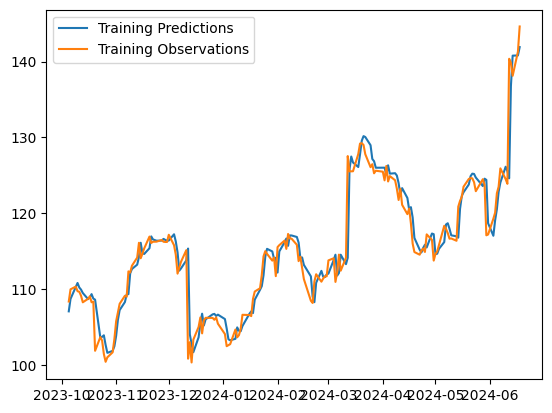

In [13]:
train_predict = model.predict(x_train).flatten()

plt.plot(dates_train, train_predict)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_training.png"
plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


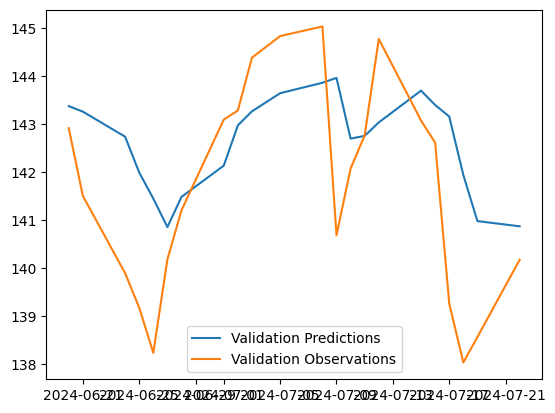

In [14]:
val_predict = model.predict(x_val).flatten()

plt.plot(dates_val, val_predict)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_validation.png"
plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


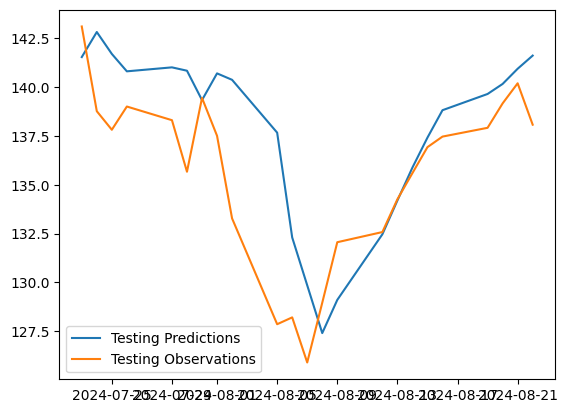

In [15]:
test_predict = model.predict(x_test).flatten()

plt.plot(dates_test, test_predict)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_testing.png"
plt.savefig(save_path)

In [16]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.
